In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels
import pickle

<h1 style="color:grey">Loading the Data</h>

In [10]:
with open('data/spx_train.pickle', 'rb') as f:
    df = pickle.load(f)
df['returns'] = df.market_value.pct_change()
df = df.dropna()
df.head()

,market_value,returns
date,,
1994-01-10,475.27,0.011428
1994-01-11,474.13,-0.002399
1994-01-12,474.17,0.000084
1994-01-13,472.47,-0.003585
1994-01-14,474.91,0.005164


# Using (stationary) Returns for modelling

In [11]:
# Test returns for stationarity
sm.tsa.adfuller(df['returns']) #p-value: 0.0
# => REJECT NULL! => Stationary!

(-17.0344571909813,
 8.280537020315404e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 -29896.04121570009)

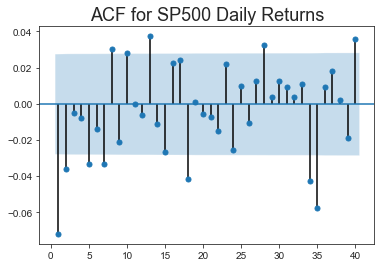

In [12]:
statsmodels.graphics.tsaplots.plot_acf(df.returns, zero=False, lags=40)
plt.title('ACF for SP500 Daily Returns', size=18)
plt.show()

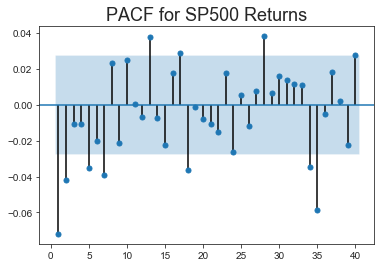

In [13]:
statsmodels.graphics.tsaplots.plot_pacf(df.returns, zero=False, lags=40)
plt.title('PACF for SP500 Returns', size=18)
plt.show()